1. Google Play Store apps and reviews

Mobile applications have become ubiquitous, offering both simplicity in creation and potential profitability. This proliferation has led to an increasing number of app developments. In this study, we aim to conduct a comprehensive analysis of the Android app market by examining over ten thousand apps available on Google Play across various categories. By delving into this data, we seek to extract valuable insights that can guide strategies for enhancing growth and user retention.

The dataset comprises two main files:

googleplaystore.csv: This file contains exhaustive details about applications available on Google Play. It includes 13 features that characterize each app.
googleplaystore_user_reviews.csv: With a compilation of 100 reviews for each app, this file presents user sentiments in a pre-processed form. These sentiments are classified into three categories: Positive, Negative, or Neutral, along with additional attributes such as Sentiment Polarity and Sentiment Subjectivity.

Through this analysis, we aim to derive actionable insights that can inform decisions related to app development, marketing, and user engagement strategies in the dynamic landscape of the Android app market.

In [1]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('googleplaystore.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  10358


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8849,DS-82 form,BUSINESS,NaN,1,28M,100+,Free,0,Everyone,Business,"April 27, 2018",1.7.7,4.1 and up
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
3597,Family Album Mitene: Private Photo & Video Sha...,PARENTING,4.7,34336,Varies with device,"1,000,000+",Free,0,Everyone,Parenting,"July 31, 2018",Varies with device,Varies with device
9817,ESLock File Recovery Lite,PRODUCTIVITY,3.0,460,161k,"50,000+",Free,0,Everyone,Productivity,"January 5, 2016",1.5.9,4.0.3 and up
1818,RULES OF SURVIVAL,GAME,4.2,1343866,56M,"10,000,000+",Free,0,Teen,Action,"August 1, 2018",1.180271.184729,4.0 and up


2. Data cleaning

Upon reviewing the dataset, it's evident that the columns crucial for our analysis—Installs, Size, and Price—require data cleaning to facilitate their utilization in subsequent code operations. Notably, the presence of special characters such as ',', '$', '+', and letters like 'M' and 'k' within these columns poses a challenge for converting the data into numerical types. To ensure ease of analysis, our focus will be on removing these special characters and letters from the Installs, Size, and Price columns, subsequently converting them into the appropriate numeric data types.

In [2]:
# List of characters to remove
chars_to_remove = ['+', ',', 'M', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col], errors='coerce')

C:\Users\nitis\AppData\Local\Temp\ipykernel_26100\2557582433.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apps[col] = apps[col].str.replace(char, '')
C:\Users\nitis\AppData\Local\Temp\ipykernel_26100\2557582433.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps[col] = apps[col].str.replace(char, '')
C:\Users\nitis\AppData\Local\Temp\ipykernel_26100\2557582433.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

3. Exploring app categories

With a user base exceeding 1 billion across 190 countries, Google Play remains a pivotal platform for app distribution, offering a significant avenue to reach a global audience. Enhancing app visibility on Google Play is crucial for businesses aiming to increase discoverability among users. In pursuit of refining the search experience, Google has implemented the practice of categorizing apps, aiming to streamline the process of app discovery and accessibility.

We will see that there are 34 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

In [6]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  34


4. Distribution of app ratings

Having examined the market distribution across various app categories, let's now explore the overall performance of these apps. App ratings, typically on a scale from 1 to 5, play a crucial role in determining app discoverability, conversion rates, and the overall branding of a company. These ratings serve as a significant performance indicator, influencing an app's visibility, user engagement, and perception within the market.

From our research, we found that the average volume of ratings across all app categories is 4.18. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

In [7]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.189542336669291


5. Size and price of an app

Now, let's delve into the analysis of app size and pricing. Large app sizes can pose challenges, potentially leading to difficulties and increased costs for users during the download process. Prolonged download times might discourage users from engaging with the mobile app altogether. Additionally, considering that each user's device has limited disk space, large app sizes can further limit user adoption.

Regarding pricing, user expectations often lean towards free or low-cost apps. This expectation becomes more significant when targeting markets in the developing world, where factors such as internet speeds, purchasing power, and exchange rates significantly impact user preferences and affordability. These considerations can compound challenges related to app adoption and user engagement in these regions.

We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

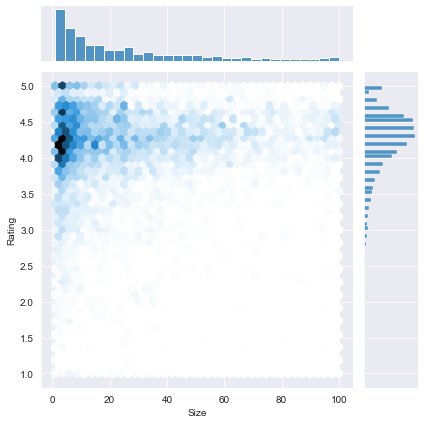

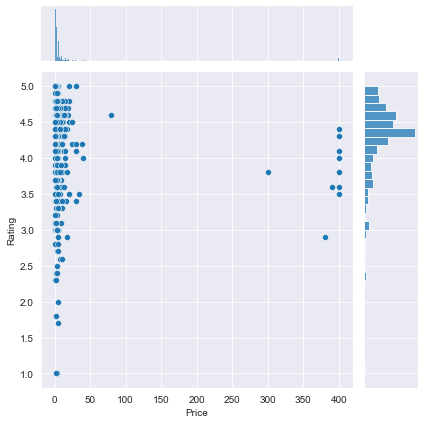

In [9]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby(apps['Category']).filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

6. Relation between app category and app price

So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80! All game apps are reasonably priced below $20.

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


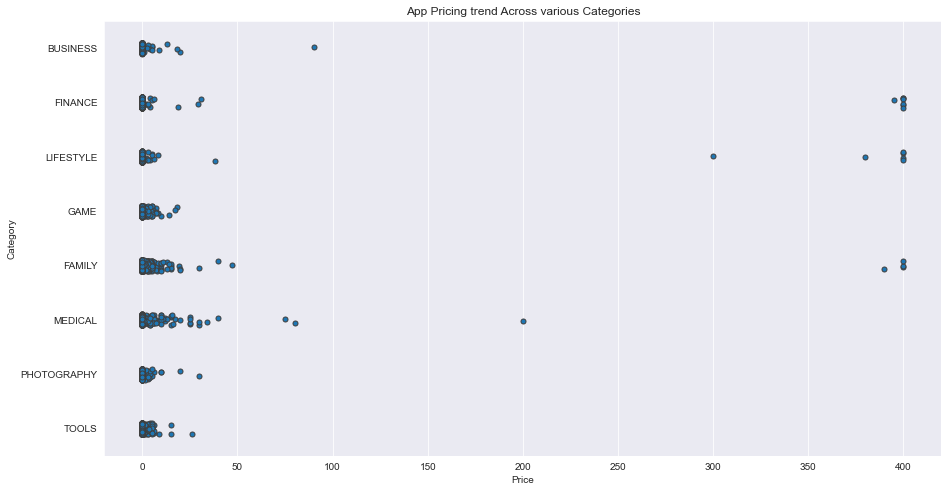

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App Pricing trend Across various Categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

7. Filter out "junk" apps

Several of the high-priced apps seem to fall into the category of what could be considered as "junk" apps—applications lacking a genuine purpose. For instance, developers might create apps like 'I Am Rich Premium' or 'most expensive app (H)' as a jest or to showcase their app development capabilities. In some cases, developers might even pursue these apps with malicious intent, attempting to generate revenue by relying on accidental purchases made by users within the app store.

Let's filter out these junk apps and re-do our visualization. The distribution of apps under $20 becomes clearer.

Text(0.5, 1.0, 'App pricing trend across various categories after filtering the junk apps')

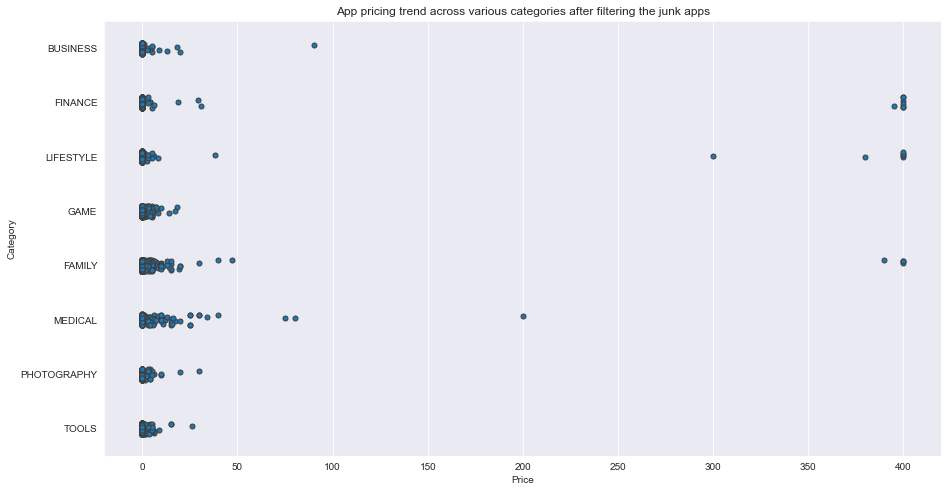

In [13]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x=popular_app_cats['Price'], y=popular_app_cats['Category'], data=apps,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across various categories after filtering the junk apps')

8. Popularity of paid apps vs free apps

Among the current pricing strategies in the Play Store, two primary models are free and paid apps. Here are some features associated with each:

Free Apps:
- Available for free download.
- Revenue generation often relies on advertisements.
- Frequently developed by companies with other product lines, utilizing the app as an extension of their offerings.
- Used as tools for customer engagement, retention, communication, and service.

Paid Apps:
- Users pay a one-time fee to download and access the app.
- Users usually don't have a trial period or opportunity to test the app before purchase.
- Regarding the installation rates, it's observed that paid apps tend to have fewer installations compared to free apps. Surprisingly, the difference in installation numbers between paid and free apps is not as substantial as initially anticipated.

In [14]:
trace0 = go.Box(
    # Data for paid apps
    y=apps['Installs'][apps['Type']=='Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps['Installs'][apps['Type']=='Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

9. Sentiment analysis of user reviews

Conducting sentiment analysis on user reviews is a valuable method to gauge public perceptions regarding a product, brand, or service. In the context of app reviews, sentiment analysis helps identify whether sentiments expressed are positive, negative, or neutral. For instance, positive app reviews might include words like 'amazing,' 'friendly,' 'good,' 'great,' and 'love,' while negative ones could contain terms such as 'malware,' 'hate,' 'problem,' 'refund,' or 'incompetent.'

Upon plotting sentiment polarity scores for user reviews of paid and free apps, a notable observation emerges: free apps tend to receive a higher frequency of critical comments, evident from the outliers on the negative y-axis. Conversely, reviews for paid apps rarely exhibit extreme negativity. This observation might suggest a trend in app quality, hinting that paid apps generally maintain higher quality standards compared to free apps. The median polarity score for paid apps appears slightly higher than that of free apps, corroborating our earlier observations.

Throughout this analysis encompassing over ten thousand Google Play Store apps, these insights can serve as valuable guidance in decision-making processes, particularly for anyone considering venturing into app development themselves.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

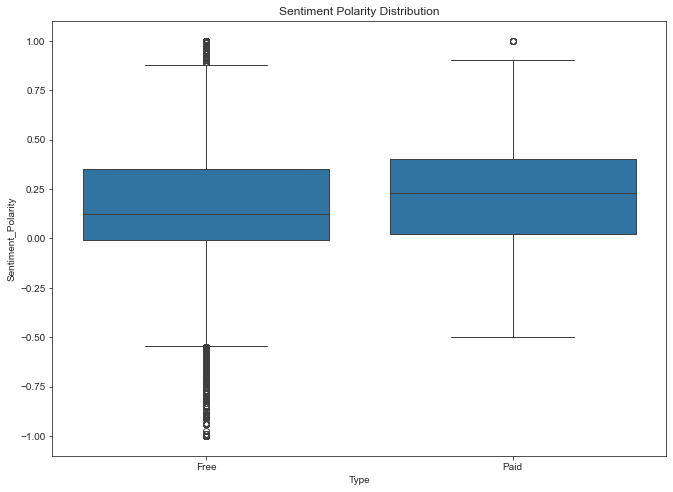

In [16]:
# Load user_reviews.csv
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')